# Confronto fra algoritmi di ordinamento: Selection Sort VS Quick Sort
Preliminarmente importo le librerie necessarie allo svolgimento dell'esercizio e imposto delle costanti per l'esecuzione dei test


In [1]:
from timeit import default_timer as timer
from random import randint, shuffle
import matplotlib.pyplot as plt
import copy
import math

MIN = 10
STEP = 100
SIZE = 10000


# Descrizione degli algoritmi
## Selection sort
Selection sort è un algoritmo di ordinamento basato su confronti che ordina sul posto.

### **Funzionamento**
Il suo funzionamento molto semplice è composto da 2 parti:
1. La ricerca dell'elemento con valore massimo
2. Lo scambio del suddetto elemento con l'ultimo elemento dell'array non ordinato


Divide così l'array in 2 partizioni: una ordinata e una non ordinata.

### **Complessità**
Selection sort ha una complessità computazionale di $O(n^2)$ data dalla ricerca del massimo nel sottoarray non ordinato eseguita $n$ volte (ciclo esterno, indice i)


In [2]:
def selectionSort(array):
  n = len(array)
  for i in range(n-1):
    # Ricerca del massimo
    max = 0 # indice del valore massimo
    for j in range(n-i):
      if array[j] > array[max]:
        max = j

    # Scambio
    array[max], array[n-i-1] = array[n-i-1], array[max]

## Quick Sort
Quick sort è un algoritmo di ordinamento basato su confronti che ordina sul posto.

### **Funzionamento**
Si basa sul metodo divide et impera. Divide l'array $A[p...r]$ in due sottoarray $A[p...q-1]$, $A[q+1...r]$ tali che gli elementi del primo sottoarray siano minore di $A[q]$ (detto pivot) e gli elementi del secondo maggiori del pivot. Ordina tali sottoarray chiamando ricorsivamente quicksort.
Per il suo funzionamento è necessaria una funzione, `partition`. Fissato un elemento, il pivot, `partition` confronta gli elementi dell'array con il pivot e partiziona l'array col pivot in posizione centrale, a sinistra gli elementi minori e a destra gli elementi maggiori di esso. Al termine di `partition` il pivot è nella sua posizione definitiva. 

### **Complessità**
Dato che in fase di generazione dell'input esso viene generato casualmente e poi permutato posso assumere di star eseguendo quick sort randomizzato.  
È facile convincersi che il costo di `partition` sia $\Theta(n)$.   
Possiamo suddividere l'analisi in caso migliore, medio e peggiore \
\
**Caso peggiore** \
Il comportamento nel caso peggiore si verifica quando `partition` divide l'array in uno di dimensione $n-1$ e l'altro di dimensione $0$ e attraverso l'analisi della ricorrenza si può verificare che l'algoritmo ha complessità nel caso peggiore di $\Theta(n^2)$ \
**Caso migliore** \
Il comportamento nel caso migliore si verifica quando i due sottoarray hanno dimensione ciascuno non maggiore di $n/2$. \
In questo caso la ricorrenza è $T(n) \leq 2T(n/2) + \Theta(n)$ e tramite il teorema dell'esperto ha soluzione $O(n \lg n)$ \
**Caso medio** \
Possiamo parlare di tempo di esecuzione atteso dato che stiamo operando con un input randomizzato in fase di generazione.  
Per dimostrare il tempo di esecuzione atteso possiamo limitarci a calcolare un limite inferiore del numero di confronti effettuati in `partition`. È d'interesse l'evento {$z_i$ è confrontato con $z_j$}, il cui calcolo del valore atteso si riduce al calcolo della probabilità dell'evento stesso $\forall i \in 1,...,n-1, \forall j \in i+1,...,n$. La probabilità di questo evento si riduce alla probabilità che $z_i$ o $z_j$ siano il primo pivot scelto in $Z_{ij} = \{z_i, z_{i+1}, ..., z_j\}$. \
Calcolandola risulta essere $O(n\lg n)$ che è il tempo di esecuzione atteso di quick sort.



In [3]:
def quickSortAux(array, p,r):
  def _partition(array, p,r):
    x = array[r]
    i = p-1
    for j in range(p,r):
      if array[j]<=x:
        i += 1
        array[i], array[j] = array[j], array[i]
    array[i+1], array[r] = array[r], array[i+1]
    return i+1
  if p<r:
    pivot = _partition(array, p,r)
    quickSortAux(array, p, pivot-1)
    quickSortAux(array, pivot+1, r)

def quickSort(array):
    quickSortAux(array, 0, len(array)-1)

## Confronto fra gli algoritmi
Per il confronto mi servirò di alcune funzioni ausiliarie
- `generateData`: genera l'array con i dati da ordinare
- `test`: misura il tempo di esecuzione in secondi, attraverso `timeit.default_timer()`
- `generatePlot`: genera il grafico con i tempi di esecuzione in funzione della dimensione dell'array da ordinare

In [4]:
def generateData(size = SIZE):
    upperBound = size * 3
    data = []
    for _ in range(size):
      data.append(randint(0,upperBound))
    shuffle(data)
    return data

In [5]:
def test(algorithm, data, min=MIN, step = STEP):
    times = []
    for i in range(min, len(data), step):
        start = timer()
        # Faccio così almeno genero una volta
        # il dataset e chiamo test su una porzione di esso
        algorithm(copy.deepcopy(data[:i]))
        end = timer()
        times.append(end-start)
    return times

In [6]:
def generatePlot(times, label, color, min = MIN, size = SIZE, step = STEP):
    # Li testo sullo stesso dataset, quindi hanno dimensione uguale
    xValue = list(range(min, size, step))
    fig, ax = plt.subplots()
    ax.set_xlabel('Numero di elementi')
    ax.set_ylabel('Tempo')
    ax.plot(xValue, times, label=label, color=color)
    ax.set_title(label)
    plt.show()

Iniziamo con i test veri e propri eseguendo gli algoritmi sulle funzioni di test scritte e generando i grafici.

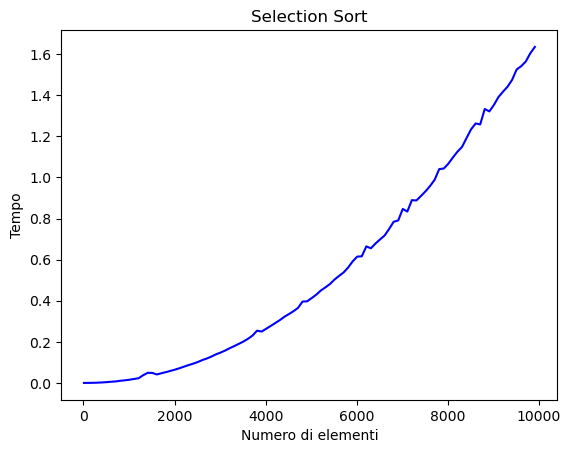

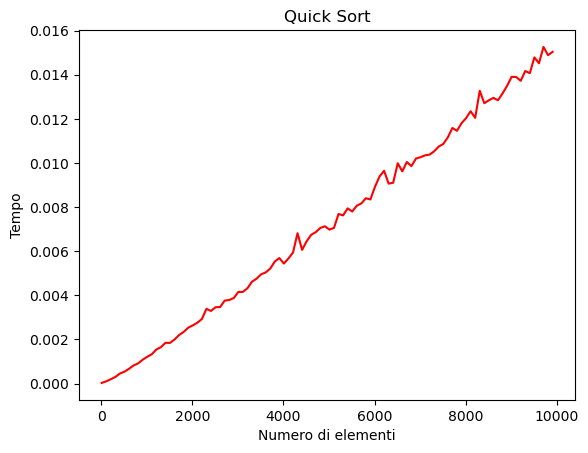

In [7]:
data = generateData()
selectionSortTimes = test(selectionSort, data)
quickSortTimes = test(quickSort, data)
generatePlot(selectionSortTimes, 'Selection Sort', 'blue')
generatePlot(quickSortTimes, 'Quick Sort', 'red')

Testiamo adesso il **caso peggiore per quick sort**, quello con l'array ordinato che come indicato prima dovrebbe avere complessità $\Theta(n^2)$

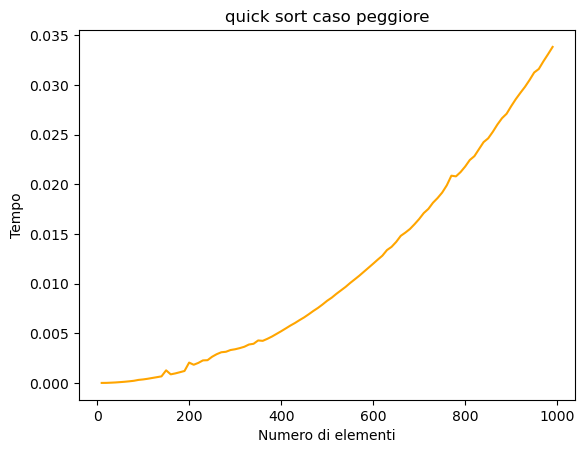

In [8]:
data = list(range(1000))
quickSortWorst = test(quickSort, data, step=10)
generatePlot(quickSortWorst, 'quick sort caso peggiore', 'orange', step = 10, size = 1000)
# I valori son messi così, numericamente, per non superare il limite massimo delle ricorsioni

## Analisi dei risultati
I grafici mostrati sopra mostrano una misurazione empirica dei tempi di esecuzione dei due algoritmi.  
Per selection sort è chiaro l'andamento quadratico mentre per quick sort l'andamento sembra quasi essere lineare quando chiaramente sappiamo che non è così dato che un ordinamento per confronti ha complessità $\Omega(n \lg n)$.  
È facile convincersi, come per selection sort, che il caso peggiore di quick sort sia $\Theta(n^2)$.  
Di seguito mostriamo che il tempo di esecuzione atteso di quick sort è effettivamente $O(n \lg n)$, quindi che il tempo misurato è maggiorato dalla funzione $n \lg n$.

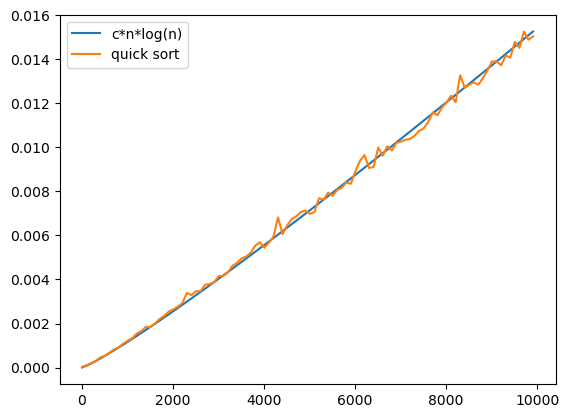

In [11]:
# Mostriamo che quick sort è effettivamente O(n lgn)
xValue = list(range(MIN, SIZE, STEP))
#val = quickSortTimes[len(quickSortTimes)-1]
val = max(quickSortTimes)
c = val / (xValue[len(xValue)-1]*math.log2(xValue[len(xValue)-1])) # Calcolo della costante nascosta in quickSortTimes
log = [i*math.log2(i)*c for i in xValue]
fig, ax = plt.subplots()
ax.plot(xValue, log, label='c*n*log(n)')
ax.plot(xValue, quickSortTimes, label='quick sort')
plt.legend()
plt.show()

Le complessità misurate trovano riscontro con i risultati teorici.  
È lampante che per un grande numero di elementi da ordinare conviene usare quick sort. Ma per un numero ridotto di elementi? \
Proviamo a limitare i grafici precedenti per un numero di elementi = 1000


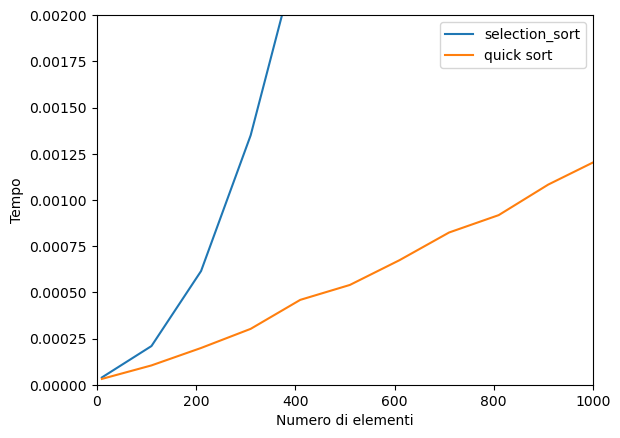

In [10]:
fig, ax = plt.subplots()
ax.plot([x for x in range(MIN, SIZE, STEP)], selectionSortTimes, label="selection_sort")
ax.plot([x for x in range(MIN, SIZE, STEP)], quickSortTimes, label="quick sort")
ax.set_xlabel('Numero di elementi')
ax.set_ylabel('Tempo')
plt.legend()
ax.set_xlim(0,1000)
ax.set_ylim(0, 0.002)
plt.show()

Quindi, notando come le due curve tendano a divergere anche per un numero di elementi molto ridotto, risulta che anche per piccoli input è preferibile usare quick sort. Selection sort è da preferire per la sua facilità implementativa e in caso si debba ordinare un array "al volo" e il linguaggio non disponga di una funzione per l'ordinamento.  
Almeno per questa implementazione entrambi sono algoritmi instabili, cioè non preservano l'ordine relativo fra gli elementi.